In [1]:
import pandas as pd
import numpy as np


In [2]:
URL = (r"C:\Users\mizai\clean_df.csv")

df=pd.read_csv(URL, index_col=[0])

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [4]:
# Análisis de patrones de características individuales mediante visualización
"""
Importe los paquetes de visualización "Matplotlib" y "Seaborn".
No se olvide de "% matplotlib inline" para trazar en un cuaderno Jupyter.
"""
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
"""
¿Cómo elegir el método de visualización adecuado?
Al visualizar variables individuales, es importante comprender
primero con qué tipo de variable se está tratando. Esto nos ayudará 
a encontrar el método de visualización adecuado para esa variable.

"""
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


In [6]:
df['peak-rpm'].dtype

dtype('float64')

In [7]:
#calculo de correlacion

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [8]:
#calcular la correlacion entre variables especificas
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


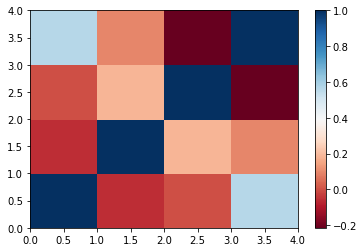

In [9]:
a= df[['bore','stroke','compression-ratio','horsepower']].corr()
plt.pcolor(a,cmap="RdBu")
plt.colorbar()
plt.show()

In [10]:
#Variables numericas continuas
"""
Las variables numéricas continuas son variables que pueden contener
cualquier valor dentro de algún rango. Pueden ser del tipo "int64" o "float64".
Una excelente forma de visualizar estas variables es 
mediante diagramas de dispersión con líneas ajustadas
Para comenzar a comprender la relación (lineal) entre una variable individual 
y el precio, podemos usar "regplot" que traza el diagrama de 
dispersión más la línea de regresión ajustada para los datos.
"""
#Veamos varios ejemplos de diferentes relaciones lineales:

'\nLas variables numéricas continuas son variables que pueden contener\ncualquier valor dentro de algún rango. Pueden ser del tipo "int64" o "float64".\nUna excelente forma de visualizar estas variables es \nmediante diagramas de dispersión con líneas ajustadas\nPara comenzar a comprender la relación (lineal) entre una variable individual \ny el precio, podemos usar "regplot" que traza el diagrama de \ndispersión más la línea de regresión ajustada para los datos.\n'

(0.0, 53289.664681710776)

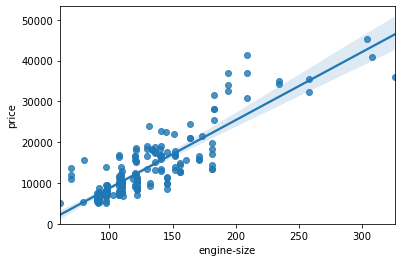

In [11]:
#Relacion lineal positiva

#Encontremos el diagrama de dispersión de "tamaño del motor" y "precio" (engine-size vs price)
#El tamaño del motor como potencial variable predictora del precio

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [12]:
"""
A medida que aumenta el tamaño del motor, aumenta el precio:
esto indica una correlación directa positiva entre estas dos variables.
El tamaño del motor parece un buen indicador del precio, ya que la línea
de regresión es casi una línea diagonal perfecta.
"""

'\nA medida que aumenta el tamaño del motor, aumenta el precio:\nesto indica una correlación directa positiva entre estas dos variables.\nEl tamaño del motor parece un buen indicador del precio, ya que la línea\nde regresión es casi una línea diagonal perfecta.\n'

In [13]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [14]:
"""
Podemos examinar la correlación entre 
'engine-size' y 'price' y ver que es aproximadamente 0,87
"""

"\nPodemos examinar la correlación entre \n'engine-size' y 'price' y ver que es aproximadamente 0,87\n"

(0.0, 47715.77435289994)

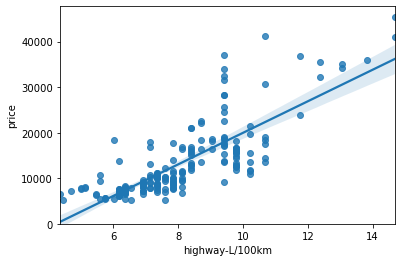

In [15]:
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

In [16]:
df[["highway-L/100km", "price"]].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


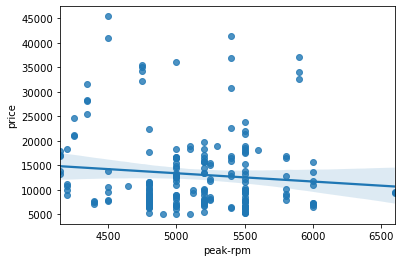

In [17]:
#Relacion Lineal debil
#vamos a ver si "peak-rpm" es predictor de la variable "price".

sns.regplot(x="peak-rpm", y="price", data=df)

In [18]:
"""
Las rpm máximas no parecen ser un buen predictor del precio en absoluto,
ya que la línea de regresión está cerca de la horizontal. Además, 
los puntos de datos están muy dispersos y lejos de la línea ajustada, 
mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.
"""

'\nLas rpm máximas no parecen ser un buen predictor del precio en absoluto,\nya que la línea de regresión está cerca de la horizontal. Además, \nlos puntos de datos están muy dispersos y lejos de la línea ajustada, \nmostrando mucha variabilidad. Por lo tanto, no es una variable confiable.\n'

In [19]:
#calculamos la correlacion entre las variables "peak-rpm" y "price". 
#y podemos ver que es aprox -0.101616

df[['peak-rpm','price']].corr()   

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [20]:
##otro ejemplo es la correlacion entre las variables 'stroke' y 'price'
df[['stroke','price']].corr()
"""
Existe una correlación débil entre la variable 'golpe' y 'precio'.
como tal, la regresión no funcionará bien. Podemos ver esto usando "regplot" 
para demostrarlo.
"""

'\nExiste una correlación débil entre la variable \'golpe\' y \'precio\'.\ncomo tal, la regresión no funcionará bien. Podemos ver esto usando "regplot" \npara demostrarlo.\n'

(0.0, 47414.1)

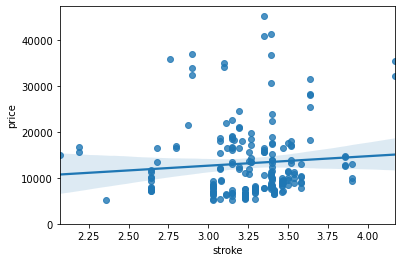

In [21]:
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0,)

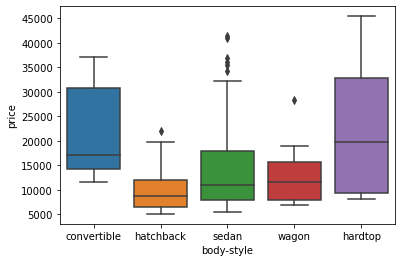

In [22]:
# VARIABLE CATEGORICA
"""
Estas son variables que describen una 'característica' de una unidad de datos
y se seleccionan de un pequeño grupo de categorías. Las variables categóricas
pueden tener el tipo "object" o "int64". Una buena manera de visualizar 
variables categóricas es mediante diagramas de caja.
"""
# por ejemplo veamos la relacion entre "body-style" y "price"

sns.boxplot(x="body-style", y="price", data=df)

In [23]:
"""
Vemos que las distribuciones de precio entre las diferentes categorías
de estilo de carrocería tienen una superposición significativa, por lo 
que el estilo de carrocería no sería un buen predictor del precio. 
"""

'\nVemos que las distribuciones de precio entre las diferentes categorías\nde estilo de carrocería tienen una superposición significativa, por lo \nque el estilo de carrocería no sería un buen predictor del precio. \n'

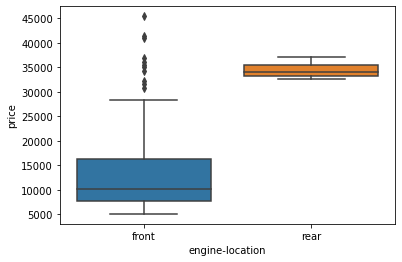

In [24]:
sns.boxplot(x="engine-location",y="price",data=df)

In [25]:
"""
Aquí vemos que la distribución del precio entre estas dos categorías
de ubicación del motor, delantera y trasera, son lo suficientemente 
distintas como para tomar la ubicación del motor como un 
buen predictor potencial del precio.
"""

'\nAquí vemos que la distribución del precio entre estas dos categorías\nde ubicación del motor, delantera y trasera, son lo suficientemente \ndistintas como para tomar la ubicación del motor como un \nbuen predictor potencial del precio.\n'

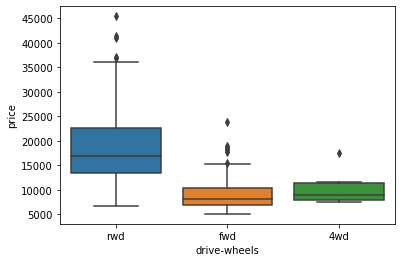

In [26]:
# Vamos a examinar 'drive-wheels' y 'price'

sns.boxplot(x="drive-wheels", y="price" , data=df)

In [27]:
"""
Aquí vemos que la distribución del precio entre las diferentes
categorías de ruedas motrices es diferente. Como tal, 
las ruedas motrices podrían potencialmente predecir el precio.

"""

'\nAquí vemos que la distribución del precio entre las diferentes\ncategorías de ruedas motrices es diferente. Como tal, \nlas ruedas motrices podrían potencialmente predecir el precio.\n\n'

In [28]:
#  Análisis Estadístico Descriptivo
"""
Primero echemos un vistazo a las variables utilizando un método de descripción.

La función describe calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor de NaN
se omite automáticamente en estas estadísticas.

Esto mostrará:

el conteo de esa variable
el significado
la desviación estándar (std)
el valor mínimo
el IQR (Rango Intercuartílico: 25%, 50% y 75%)
el valor máximo
Podemos aplicar el método "describir" de la siguiente manera:
"""

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [29]:
"""
La configuración predeterminada de "describe()" 
omite variables de tipo objeto. Podemos aplicar
el método "describe()" sobre las variables de 
tipo 'objeto' de la siguiente manera:
"""
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [30]:
# el cuenta valores  (value counts)
df['drive-wheels'].value_counts()

"""
Value Counts es una buena manera de entender cuántas unidades de cada 
característica/variable tenemos. Podemos aplicar el método "value_counts"
en la columna "drive-wheels". No olvide que el método "value_counts" 
solo funciona en series de pandas, no en marcos de datos de pandas.
Como resultado, solo incluimos un corchete df['drive-wheels'], no dos 
corchetes df[['drive-wheels']]
ejemplo:
serie de datos en pandas= df["drive-wheels"]
marco de datos en pandas= df[["drive-wheels"]]
"""

'\nValue Counts es una buena manera de entender cuántas unidades de cada \ncaracterística/variable tenemos. Podemos aplicar el método "value_counts"\nen la columna "drive-wheels". No olvide que el método "value_counts" \nsolo funciona en series de pandas, no en marcos de datos de pandas.\nComo resultado, solo incluimos un corchete df[\'drive-wheels\'], no dos \ncorchetes df[[\'drive-wheels\']]\n\n'

In [31]:
#Podemos convertir la serie a un marco de datos de la siguiente manera:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [32]:
"""
Repitamos los pasos anteriores, pero guardemos los resultados
en el marco de datos "drive_wheels_counts" y cambiemos el nombre
de la columna 'drive-wheels' a 'value_counts'.
"""
drive_wheels_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace = True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [33]:
#Podemos repetir el proceso anterior para la variable 'ubicación del motor'.
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


In [34]:
"""
Después de examinar los recuentos de valor de la ubicación del motor,
vemos que la ubicación del motor no sería una buena variable de predicción 
del precio. Esto se debe a que solo tenemos tres autos con motor trasero
y 198 con motor delantero, por lo que este resultado está sesgado.
Por lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.
"""

'\nDespués de examinar los recuentos de valor de la ubicación del motor,\nvemos que la ubicación del motor no sería una buena variable de predicción \ndel precio. Esto se debe a que solo tenemos tres autos con motor trasero\ny 198 con motor delantero, por lo que este resultado está sesgado.\nPor lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.\n'

In [35]:
# conceptos basicos de agrupacion
"""
#Por ejemplo, agrupemos por la variable "drive-wheels".
Vemos que hay 3 categorías diferentes de ruedas motrices.0"""

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [36]:
"""
Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa,
podemos agrupar las "ruedas motrices" y luego promediarlas.

Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price',
luego asignarlas a la variable "df_group_one".
"""
df_group_one = df[['drive-wheels','body-style','price']]

In [37]:
#resultado del agrupamiento
df_group_one = df_group_one.groupby(['drive-wheels'], as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [38]:
"""
Según nuestros datos, parece que los vehículos con tracción trasera son,
en promedio, los más caros, mientras que los de 4 ruedas y los de tracción
delantera tienen aproximadamente el mismo precio.

También puede agrupar por múltiples variables. Por ejemplo, agrupemos 
por 'ruedas motrices' y 'estilo de carrocería'. Esto agrupa el marco
de datos por la combinación única de 'ruedas motrices' y 'estilo de carrocería'.
Podemos almacenar los resultados en la variable 'grouped_test1'.
"""
#resultado de la agrupacion
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [39]:
"""
Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica.
Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y 
otra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinámica usando el método "pivot" 
para crear una tabla dinámica a partir de los grupos.
"""
#En este caso, dejaremos la variable drive-wheels como las filas de la tabla y pivotaremos el estilo del cuerpo para
#que se convierta en las columnas de la tabla:

'\nEstos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica.\nUna tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y \notra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinámica usando el método "pivot" \npara crear una tabla dinámica a partir de los grupos.\n'

In [40]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [41]:
"""
A menudo, no tendremos datos para algunas de las celdas dinámicas.
Podemos llenar estas celdas que faltan con el valor 0, pero también
se podría usar cualquier otro valor. Cabe mencionar que la falta de datos 
es un tema bastante complejo y es un curso completo por sí solo.
"""


'\nA menudo, no tendremos datos para algunas de las celdas dinámicas.\nPodemos llenar estas celdas que faltan con el valor 0, pero también\nse podría usar cualquier otro valor. Cabe mencionar que la falta de datos \nes un tema bastante complejo y es un curso completo por sí solo.\n'

In [42]:
#reemplaza los valores faltantes con el valor 0
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

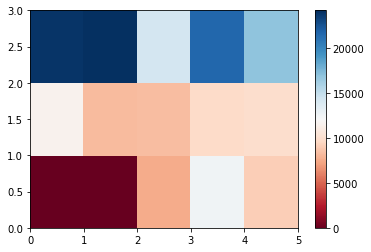

In [43]:
#usamos el resultado de grouped
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [44]:
"""
El mapa de calor traza la variable objetivo (price) proporcional al color con respecto a las variables
'drive-wheels' y 'body-style' en el eje vertical y horizontal, respectivamente. 
Esto nos permite visualizar cómo se relaciona el "price" con la 'drive-wheels' y el 'body-style'.
"""

'\nEl mapa de calor traza la variable objetivo (price) proporcional al color con respecto a las variables\n\'dirve-wheels\' y \'body-style\' en el eje vertical y horizontal, respectivamente. \nEsto nos permite visualizar cómo se relaciona el "price" con la \'drive-wheels\' y el \'body-style\'.\n'

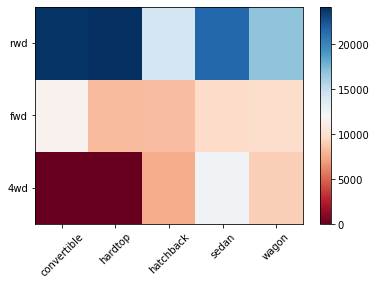

In [45]:
#Las etiquetas predeterminadas no nos transmiten información útil. Cambiemos eso:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names - nombre de etiquetas
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center -mover marcas y etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels - insertar etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long- rotar el nombre de la etiqueta horizontal en su posicion respecto al angulo que se indique
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

In [46]:
"""
La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python brindan una gran libertad. 
Profundizaremos más en un curso separado de visualizaciones de Python.
La pregunta principal que queremos responder en este módulo es: "¿Cuáles son las características principales que tienen
un mayor impacto en el precio del automóvil?".

Para obtener una mejor medida de las características importantes,
observamos la correlación de estas variables con el precio del automóvil. 
En otras palabras: ¿cómo depende el precio del automóvil de esta variable?
"""

'\nLa visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python brindan una gran libertad. \nProfundizaremos más en un curso separado de visualizaciones de Python.\nLa pregunta principal que queremos responder en este módulo es: "¿Cuáles son las características principales que tienen\nun mayor impacto en el precio del automóvil?".\n\nPara obtener una mejor medida de las características importantes,\nobservamos la correlación de estas variables con el precio del automóvil. \nEn otras palabras: ¿cómo depende el precio del automóvil de esta variable?\n'

In [47]:
#5 .    Correlación y causalidad
"""
correlacion: una medida del grado de interdependencia entre las variables
causalidad: la relacion entre causa y efecto entre dos variables 

Es importante saber la diferencia entre estos dos. La correlación no implica causa.
Determinar la correlación es mucho más simple que determinar la causalidad, ya que 
la causalidad puede requerir una experimentación independiente.
"""
#correlación de Pearson
"""
La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

     1: Correlación lineal positiva perfecta.
     0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.
     -1: Correlación lineal negativa perfecta.

La correlación de Pearson es el método predeterminado de la función "corr". Como antes, 
podemos calcular la Correlación de Pearson de las variables 'int64' o 'float64'.
"""

'\nLa Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.\n\nEl coeficiente resultante es un valor entre -1 y 1 inclusive, donde:\n\n     1: Correlación lineal positiva perfecta.\n     0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.\n     -1: Correlación lineal negativa perfecta.\n\nLa correlación de Pearson es el método predeterminado de la función "corr". Como antes, \npodemos calcular la Correlación de Pearson de las variables \'int64\' o \'float64\'.\n'

In [48]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [49]:
"""
A veces nos gustaría saber el significado de la correlación estimada.

valor p

¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables
sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa 
que estamos 95% seguros de que la correlación entre las variables es significativa.

Por convención, cuando el:
el valor p es <0.001: decimos que hay fuerte evidencia de que la correlación es significativa.
el valor p es <0,05: existe evidencia moderada de que la correlación es significativa.
el valor p es <0.1: hay evidencia débil de que la correlación es significativa.
el valor p es >0,1: no hay evidencia de que la correlación sea significativa.

Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

"""

'\nA veces nos gustaría saber el significado de la correlación estimada.\n\nvalor p\n\n¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables\nsea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa \nque estamos 95% seguros de que la correlación entre las variables es significativa.\n\nPor convención, cuando el:\nel valor p es <0.001: decimos que hay fuerte evidencia de que la correlación es significativa.\nel valor p es <0,05: existe evidencia moderada de que la correlación es significativa.\nel valor p es <0.1: hay evidencia débil de que la correlación es significativa.\nel valor p es >0,1: no hay evidencia de que la correlación sea significativa.\n\nPodemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".\n\n'

In [50]:
from scipy import stats

In [51]:
# WHEELS-BASE VS PRICE
"""Calculemos el coeficiente de correlación de Pearson y el valor P de la 'distancia entre ejes' y el 'precio'."""

"Calculemos el coeficiente de correlación de Pearson y el valor P de la 'distancia entre ejes' y el 'precio'."

In [52]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


In [53]:
"""Conclusión:

Dado que el valor p es <0,001, la correlación entre la distancia entre ejes y el precio 
es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0,585).
"""

'Conclusión:\n\nDado que el valor p es <0,001, la correlación entre la distancia entre ejes y el precio \nes estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0,585).\n'

In [54]:
#    Horsepower vs. Price

"""vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'horsepower' y 'price'."""


"vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'horsepower' y 'price'."

In [55]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


In [56]:
#Conclusión:

"""Dado que el valor p es <0,001, la correlación entre la potencia y el precio
es estadísticamente significativa y la relación lineal es bastante fuerte (~0,809, cerca de 1)."""

'Dado que el valor p es <0,001, la correlación entre la potencia y el precio\nes estadísticamente significativa y la relación lineal es bastante fuerte (~0,809, cerca de 1).'

In [57]:
#    Length vs. Price   - longuitud vs precio

pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("el coeficiente de correlacion de Pearson es", pearson_coef,"con un valor de P-valor de P = ",p_value)

el coeficiente de correlacion de Pearson es 0.690628380448364 con un valor de P-valor de P =  8.016477466158986e-30


In [ ]:
"""
Conclusion: 
ya que el P valor es <0.001, la correlacion entre longuitud y precio es
estadisticamente significativa , y la relacion linear es moderadamente fuerte (~0.691)
"""

In [58]:
#  WIDTH VS PRICE  -- ancho vs precio
"""
vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'width' y 'price'.
"""

pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("el coeficiente de correlacion de Pearson es", pearson_coef, "con un valor de P_value de p =", p_value)

el coeficiente de correlacion de Pearson es 0.7512653440522674 con un valor de P_value de p = 9.200335510481516e-38


In [ ]:
"""
Conclusión:

Dado que el valor p es < 0,001, la correlación entre el ancho y el precio es estadísticamente significativa 
y la relación lineal es bastante fuerte (~0,751).
"""

In [59]:
#  Curb-Weight vs. Price    ---peso en vacio vs precio
"""
vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'Curb-Weight' y 'price'.
"""
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("el coeficiente de correlacion de Pearson es", pearson_coef, "con un valor de P_value de p =", p_value)


el coeficiente de correlacion de Pearson es 0.8344145257702846 con un valor de P_value de p = 2.1895772388936914e-53


In [ ]:
"""
Conclusión:

Dado que el valor p es <0,001, la correlación entre el peso en vacío y el precio 
es estadísticamente significativa y la relación lineal es bastante fuerte (~0,834)
"""

In [60]:
#   Engine-Size vs. Price  --- tamaño de la maquina vs precio

"""
vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'engine-size' y 'price'.
"""
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("el coeficiente de correlacion de Pearson es", pearson_coef, "con un valor de P_value de p =", p_value)


el coeficiente de correlacion de Pearson es 0.8723351674455185 con un valor de P_value de p = 9.265491622198389e-64


In [ ]:
"""
Conclusión:

Dado que el valor p es <0,001, la correlación entre el tamaño del motor y el precio 
es estadísticamente significativa y la relación lineal es muy fuerte (~0,872).
"""

In [61]:
#   Bore vs. Price
"""
vamos a calcular el coeficiente de correlacion de Pearson y el valor P de  'bore' y 'price'.
"""
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print("el coeficiente de correlacion de Pearson es", pearson_coef, "con un valor de P_value de p =", p_value)


el coeficiente de correlacion de Pearson es 0.5431553832626602 con un valor de P_value de p = 8.049189483935489e-17


In [ ]:
"""
Conclusión:

Dado que el valor p es <0,001, la correlación entre el diámetro interior y el precio es estadísticamente significativa, 
pero la relación lineal es solo moderada (~0,521).

Podemos relacionar el proceso para cada 'city-mpg' y 'highway-mpg':
"""

In [62]:
#City-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


In [ ]:
"""
Conclusión:

Dado que el valor p es <
0,001, la correlación entre ciudad-mpg y precio es estadísticamente significativa,
y el coeficiente de alrededor de -0,687 muestra que la relación es negativa y moderadamente fuerte.
"""

In [ ]:
#   6 )  ANOVA

"""
ANOVA: Análisis de Varianza

El Análisis de Varianza (ANOVA) es un método estadístico utilizado para probar si existen diferencias 
significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:

Puntuación de la prueba F: ANOVA asume que las medias de todos los grupos son iguales, 
calcula cuánto se desvían las medias reales de la suposición y lo informa como la puntuación de la prueba F.
Una puntuación mayor significa que hay una diferencia mayor entre las medias.

Valor P: el valor P indica cuán estadísticamente significativo es nuestro valor de puntaje calculado.

Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, 
esperamos que ANOVA arroje una puntuación de prueba F considerable y un valor de p pequeño.
"""


In [ ]:
#Drive Wheels
"""
Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable,
la función groupby será útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, 
no necesitamos tomar el promedio de antemano.

Para ver si los diferentes tipos de 'ruedas motrices' impactan en el 'precio', agrupamos los datos.
"""

In [65]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [66]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [67]:
#Podemos obtener los valores del grupo de métodos usando el método "get_group".

grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [68]:
#Podemos usar la función 'f_oneway' en el módulo 'stats' para obtener el puntaje de la prueba F y el valor P.
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [ ]:
"""
Este es un gran resultado con una gran puntuación de la prueba F que muestra una fuerte correlación
y un valor P de casi 0, lo que implica una significación estadística casi segura. 
Pero, ¿significa esto que los tres grupos evaluados están altamente correlacionados?

Examinémoslos por separado.
"""

In [69]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [70]:
#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [71]:
#4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [ ]:
#Conclusión: Variables importantes
"""
Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables es importante tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:

Variables numéricas continuas:

     Longitud
     Ancho
     peso en vacío
     Tamaño de la maquina
     Caballo de fuerza
     Ciudad-mpg
     Autopista-mpg
     Distancia entre ejes
     Aburrir

Variables categóricas:

     Ruedas motrices

A medida que avanzamos en la creación de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afecten de manera significativa a nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.
¡Gracias por completar este laboratorio!¶

"""

In [ ]:
"""
Thank you for completing this lab!
Author
Joseph Santarcangelo

traduccion al español y correccion 
Marcelo Reinoso

Other Contributors

Mahdi Noorian PhD

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

Fiorella Wenver

Yi Yao.
Change Log
Date (YYYY-MM-DD) 	Version 	Changed By 	Change Description
2020-10-30 	2.1 	Lakshmi 	changed URL of csv
2020-08-27 	2.0 	Lavanya 	Moved lab to course repo in GitLab
© IBM Corporation 2020. All rights reserved.

"""